In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv("../dataset/social_networking_ads_column_filtered.csv")

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x = df.iloc[:,:-1]
y = df['Purchased']

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [13]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [14]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [34]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
dt1.score(x_test,y_test)

0.8375

In [40]:
dt1.predict([[46,28000]])

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [27]:
df.sample(10)

,Age,EstimatedSalary,Purchased
18,46,28000,1
45,23,20000,0
158,26,30000,0
84,30,62000,0
113,37,55000,0
136,20,82000,0
258,58,95000,1
80,30,80000,0
237,37,80000,0
259,45,131000,1


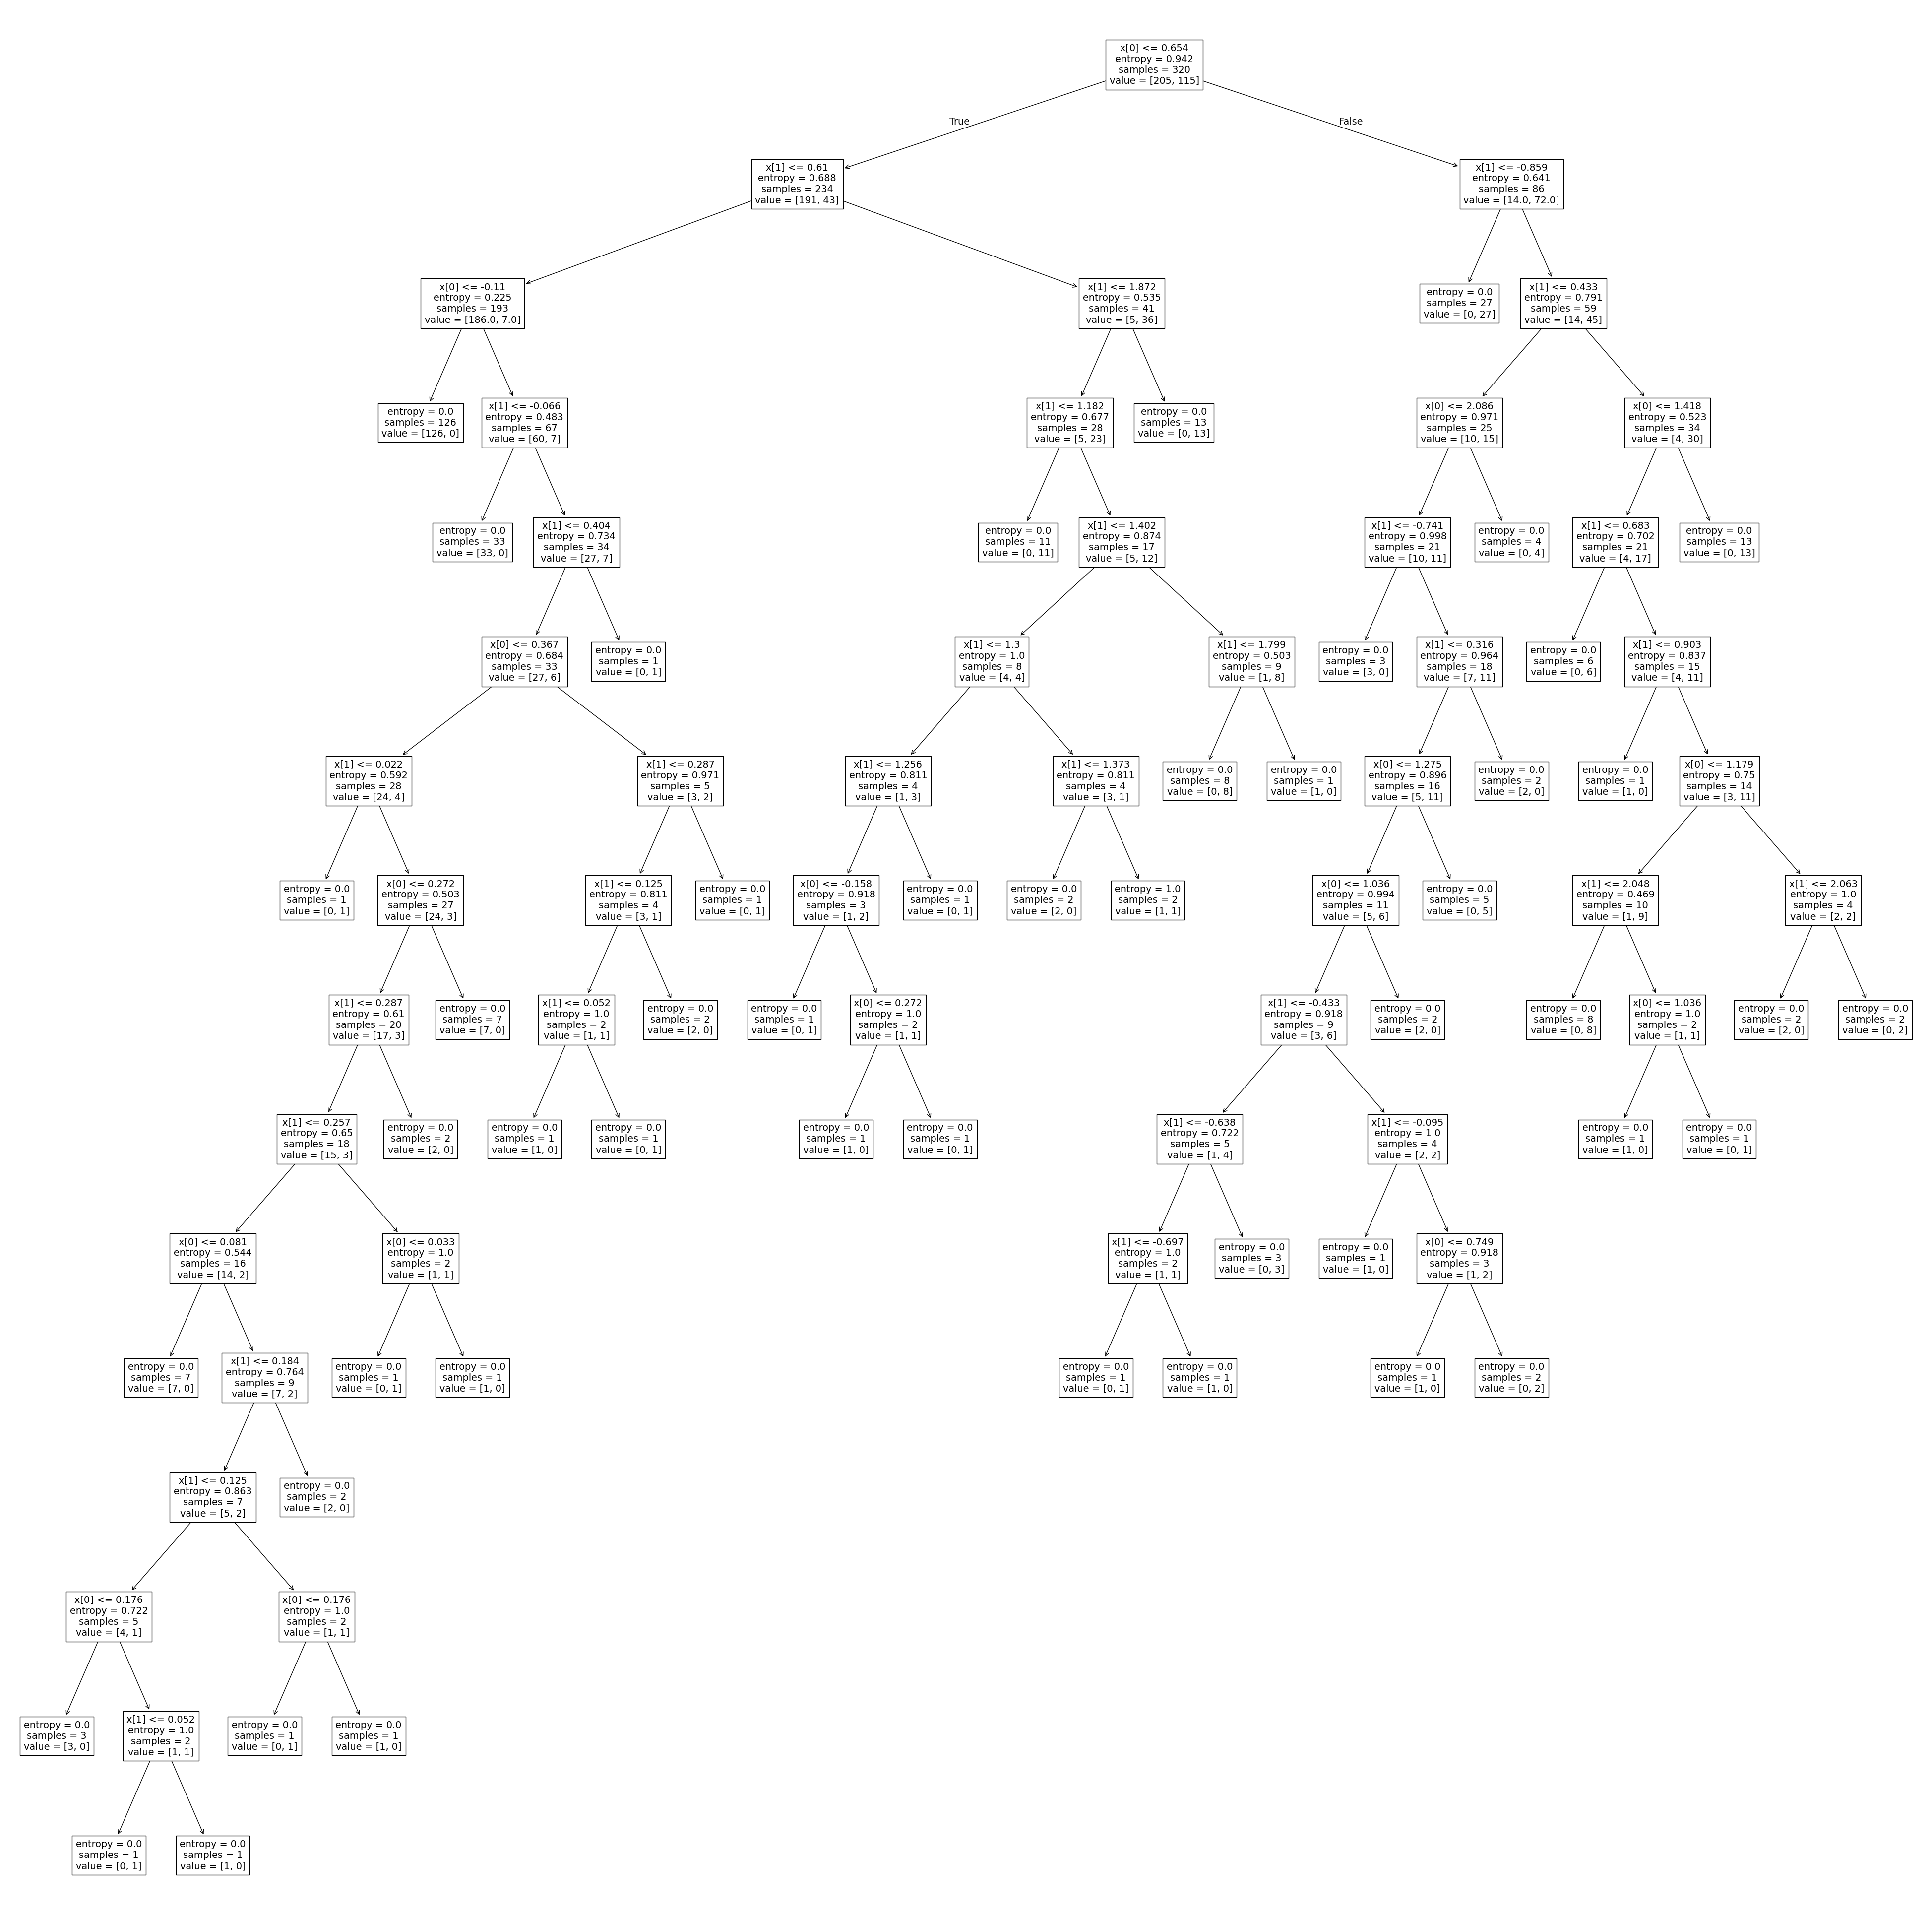

In [42]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()

In [43]:
from mlxtend.plotting import plot_decision_regions

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

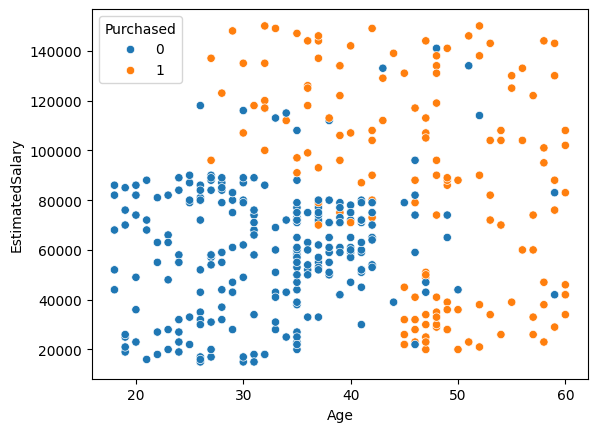

In [41]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=df,hue="Purchased")

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

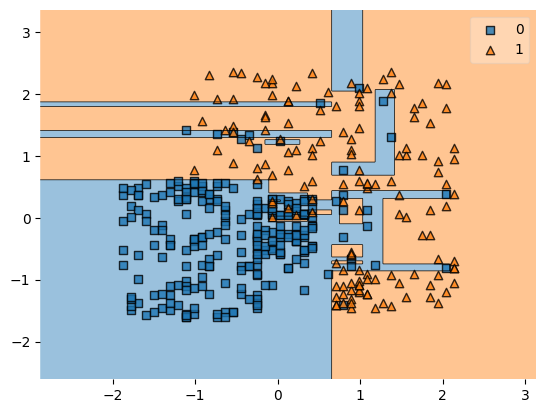

In [44]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)